In this notebook I will analyze binary netron stars and their coalescence time

In [1]:
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
import useful_fncs
# usually the recommended one that is part of the cluster

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [19]:
# reading in the HDF5 file
pathToNS_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_wWeights_NEW_LG_EDIT_1.h5' #path of the hdf5 file

Data_3 = h5.File(pathToNS_H5)

In [20]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
DCOs = pd.DataFrame() # making a pandas dataframe

for key in Data_3["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCOs[key] = Data_3["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [21]:
DCOs

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
0,0,2.328412e+13,1.110223e-16,0,b'4 ',b'NA ',31.911977,27.289501,0,0.000473,...,158,43.919694,14,14,4.347694,0.000000,0.000000,0.0,0.000000,10.000000
1,0,3.974767e+19,5.431362e-02,0,b'NA ',b'NA ',5.843895,5.255385,0,0.000179,...,326,453.863126,14,14,16.329921,0.000000,0.000000,0.0,-0.024128,10.000000
2,1,6.281330e+02,5.821410e-01,0,b'2 ',b'4-8 ',9.648989,1.454633,1,0.001588,...,695,0.033701,14,13,14.260153,0.000880,-1.910579,0.0,0.000000,10.000000
3,1,5.402979e+03,9.111420e-01,0,b'4 ',b'5-8 ',3.382412,1.470501,1,0.000260,...,858,0.114685,14,13,19.579543,0.000237,-1.725880,0.0,0.000000,10.000000
4,0,8.206604e+18,6.933256e-01,0,b'NA ',b'NA ',10.933214,2.614135,0,0.001677,...,948,557.934571,14,14,31.652154,0.000000,0.000000,0.0,-0.021719,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,1,1.977954e+05,5.422785e-01,0,b'2-9 ',b'5-8 ',1.260006,1.204723,0,0.014732,...,749623,0.052772,13,13,52.212536,0.000006,-0.913070,0.0,0.000000,0.325322
459,1,7.462776e+03,8.100584e-01,0,b'2 ',b'5 ',1.260000,1.665170,1,0.001125,...,769721,0.048950,13,13,45.239838,0.000000,0.000000,0.0,-0.000076,8.307509
460,1,1.917641e+02,3.043255e-01,0,b'2 ',b'4-8 ',1.260154,1.136818,1,0.000217,...,818419,0.007318,13,13,52.136253,0.000154,-1.169025,0.0,0.000000,1.178239
461,1,8.549317e+04,4.002102e-01,0,b'2 ',b'5-8 ',1.260015,1.203535,0,0.000424,...,934784,0.036748,13,13,44.343411,0.000015,-1.062509,0.0,0.000000,2.480558


Now we only want to select for binary neutron star systems

In [22]:
NS_bool = np.logical_and(DCOs['Stellar_Type(1)']==13,DCOs['Stellar_Type(2)']==13)

In [23]:
DCOs_NS = DCOs[NS_bool]
DCOs_NS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
393,1,8.443403e+03,0.097332,0,b'2 ',b'5-8 ',1.260029,1.219462,1,0.001098,...,85166,0.017918,13,13,52.855159,0.000029,-1.010526,0.0,0.000000,1.046706
455,1,2.801154e+06,0.437911,0,b'2 ',b'5-8 ',1.260003,1.191463,0,0.001159,...,311761,0.090579,13,13,58.693874,0.000003,-0.885553,0.0,0.000000,0.312158
456,1,1.049051e+05,0.803341,0,b'2 ',b'5-8 ',1.260030,1.163023,0,0.000908,...,564410,0.080514,13,13,51.412246,0.000030,-1.052524,0.0,0.000000,0.358832
457,1,6.357173e+01,0.781662,0,b'2 ',b'4-8 ',1.260085,1.473478,1,0.001051,...,587802,0.012767,13,13,37.798543,0.000085,-1.489004,0.0,0.000000,7.353215
458,1,1.977954e+05,0.542279,0,b'2-9 ',b'5-8 ',1.260006,1.204723,0,0.014732,...,749623,0.052772,13,13,52.212536,0.000006,-0.913070,0.0,0.000000,0.325322
459,1,7.462776e+03,0.810058,0,b'2 ',b'5 ',1.260000,1.665170,1,0.001125,...,769721,0.048950,13,13,45.239838,0.000000,0.000000,0.0,-0.000076,8.307509
460,1,1.917641e+02,0.304326,0,b'2 ',b'4-8 ',1.260154,1.136818,1,0.000217,...,818419,0.007318,13,13,52.136253,0.000154,-1.169025,0.0,0.000000,1.178239
461,1,8.549317e+04,0.400210,0,b'2 ',b'5-8 ',1.260015,1.203535,0,0.000424,...,934784,0.036748,13,13,44.343411,0.000015,-1.062509,0.0,0.000000,2.480558
462,1,4.473679e+03,0.916788,0,b'2 ',b'5-8 ',1.260003,1.162398,1,0.000810,...,975521,0.071350,13,13,50.761040,0.000003,-0.920522,0.0,0.000000,0.671464


Let's now calculate the coalescence time of these binary NS just to make sure my method matches that of COMPAS'

In [24]:
# let's check the units of things just to make sure we are making correct conversions
# let's first look at the units of some parameters to see if anything must be converted
DCO_3 = Data_3["BSE_Double_Compact_Objects"]
print(DCO_3['Mass(1)'].attrs['units']) 
print(DCO_3['SemiMajorAxis@DCO'].attrs['units'])
print(DCO_3['Coalescence_Time'].attrs['units'])

b'Msol'
b'AU'
b'Myr'


In [41]:
def tgw(a,e,Mmoremass,Mlessmass,Data,key,parameter):

    """
    Calcualte the coalescence time (inspiral time)
    a = semi major axis (expected in AU or Rsun)
    e = eccentricity
    Mmoremass = mass of the more massive compact object (expected in solar masses!)
    Mlessmass = mass of the less massive compact object (expected in solar masses!)
    """

    a = (a * u.AU).to(u.m)      

    Mmoremass = (Mmoremass * u.Msun).to(u.kg)
    Mlessmass = (Mlessmass * u.Msun).to(u.kg)

    tc = ((((5*((a)**4)*(const.c**5))/(256*(const.G**3)*(Mmoremass)*(Mlessmass)*((Mmoremass)+(Mlessmass))))*(1+(0.27*e**10)+(0.33*e**20)+(0.2*e**1000))*(1-(e**2))**(7/2)))*((3.171e-8)*(u.yr/u.s))*((1e-6)*(u.Myr/u.yr))

    return tc.values

In [42]:
time_col_ns = tgw((DCOs_NS['SemiMajorAxis@DCO'].values),(DCOs_NS['Eccentricity@DCO']),(DCOs_NS['Mass(1)'].values),(DCOs_NS['Mass(2)'].values),Data_3,'BSE_Double_Compact_Objects','SemiMajorAxis@DCO')


In [43]:
# let's grab the coalescence time COMPAS calculated

coalescence_COMPAS = DCOs_NS['Coalescence_Time']


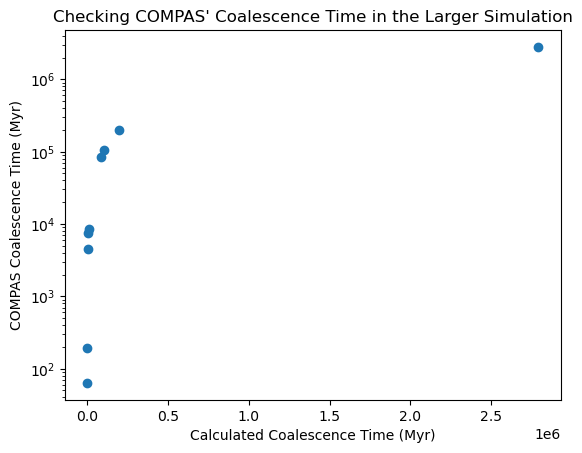

In [44]:
# plotting these against each other just to see if there is any extreme variation 
plt.scatter(time_col_ns,coalescence_COMPAS)
plt.xlabel("Calculated Coalescence Time (Myr)")
plt.ylabel("COMPAS Coalescence Time (Myr)")
plt.title("Checking COMPAS' Coalescence Time in the Larger Simulation")
plt.yscale('log')
# this mostly looks like a linear line so these values are pretty similar

In [13]:
# let's look at these values in more depth to see the variations in times
DCOs_NS.insert(2,"Calculated_Coalescence_Time",time_gw,True)

In [14]:
# in case you run the cell above more than once here is a way to remove the extra column
# DCOs_NS = DCOs_NS.drop('Calculated_Coalescence_Time', axis=1)

In [15]:
DCOs_NS

,CE_Event_Counter,Coalescence_Time,Calculated_Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,...,Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2)
135,1,1290.888074,1284.722751,0.478499,0,b'5 ',b'8 ',1.277616,1.277584,1,...,0,7200446,0.014269,13,13,20.762234,0.000032,-1.234905,0.0,0.000000
163,1,892032.868288,887772.490748,0.455978,0,b'2 ',b'4-8 ',1.260006,1.277584,0,...,0,7200513,0.071085,13,13,45.930452,0.000006,-1.036399,0.0,0.000000
175,1,13.637209,13.572077,0.391140,0,b'2 ',b'4-8 ',1.260118,1.277584,1,...,0,7200542,0.004192,13,13,37.853619,0.000118,-1.502255,0.0,0.000000
584,1,5.971833,5.943312,0.428404,0,b'2 ',b'4-8 ',1.260170,1.277584,1,...,0,7201879,0.003521,13,13,39.146374,0.000170,-1.586152,0.0,0.000000
595,1,12.540004,12.480112,0.465046,0,b'2 ',b'4-8 ',1.260101,1.277584,1,...,0,7201909,0.004393,13,13,37.405071,0.000101,-1.545267,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394063,1,34.366000,34.201866,0.721856,0,b'4-8 ',b'8 ',1.333267,1.795183,1,...,0,7698724,0.010093,13,13,20.991124,0.000033,-1.615593,0.0,0.000000
2394199,1,4.019679,4.000481,0.261607,0,b'2 ',b'4-8 ',1.260165,1.277584,1,...,0,7699154,0.002842,13,13,38.851617,0.000165,-1.554912,0.0,0.000000
2394270,1,11.158284,11.104991,0.865659,0,b'4-8 ',b'NA ',1.277584,1.277584,1,...,0,7699379,0.011403,13,13,37.856397,0.000000,0.000000,0.0,-0.000027
2394290,1,63.301595,62.999265,0.465590,0,b'4-8 ',b'8 ',1.277647,1.277584,1,...,0,7699443,0.006623,13,13,36.832275,0.000063,-1.432793,0.0,0.000000


In [16]:
len(np.where(abs(DCOs_NS['Coalescence_Time']-DCOs_NS["Calculated_Coalescence_Time"])<10)[0])
# only about 60% of the times have a difference of 10 Myr

19316

In [46]:
# Data_3.close()

#### Let's do this again but for the low mass simulation from COMPAS

In [18]:
# reading in the HDF5 file
pathToLM_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_LowMass_1.h5' #path of the hdf5 file

Data_2 = h5.File(pathToLM_H5)

In [19]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
DCOs2 = pd.DataFrame() # making a pandas dataframe

for key in Data_2["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCOs2[key] = Data_2["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

Now we only want to select for binary neutron star systems

In [21]:
NS_bool2 = np.logical_and(DCOs2['Stellar_Type(1)']==13,DCOs2['Stellar_Type(2)']==13)

In [23]:
DCOs2_NS = DCOs2[NS_bool2]
DCOs2_NS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2)
14,1,5.022372e+04,0.095905,0,b'2 ',b'4-8 ',1.260009,1.277584,0,0.000256,...,0,409284,0.028468,13,13,47.267532,0.000009,-1.038851,0.0,0.000000
15,1,4.748315e+00,0.623930,0,b'2 ',b'4-8 ',1.260126,1.322620,1,0.000323,...,0,418855,0.004341,13,13,33.649443,0.000126,-1.694017,0.0,0.000000
23,1,3.162000e+00,0.418140,0,b'2 ',b'4-8 ',1.260180,1.277584,1,0.000511,...,0,438875,0.002976,13,13,35.372554,0.000180,-1.657328,0.0,0.000000
29,1,3.406543e+01,0.189972,0,b'4-8 ',b'8 ',1.277719,1.277584,1,0.001198,...,0,651313,0.004731,13,13,40.497868,0.000135,-1.335271,0.0,0.000000
44,1,1.615129e+05,0.878717,0,b'2 ',b'4 ',1.260000,1.454858,0,0.008790,...,0,646959,0.141550,13,13,33.597505,0.000000,0.000000,0.0,-0.002908
60,1,3.148303e+01,0.163235,0,b'5 ',b'8 ',1.277732,1.277584,1,0.004774,...,0,451628,0.004599,13,13,29.821243,0.000149,-1.317773,0.0,0.000000
64,1,9.700190e+04,0.464283,0,b'2 ',b'5-8 ',1.260007,1.277584,0,0.006129,...,0,465375,0.041168,13,13,36.428816,0.000007,-1.165779,0.0,0.000000
70,1,5.241833e+05,0.155147,0,b'2 ',b'3-8 ',1.260007,1.277584,0,0.021052,...,0,473618,0.051850,13,13,36.441770,0.000007,-0.895173,0.0,0.000000
75,1,8.582748e+01,0.459599,0,b'4-8 ',b'8 ',1.277633,1.277584,1,0.000840,...,0,761020,0.007103,13,13,40.301712,0.000049,-1.432305,0.0,0.000000
86,1,1.563690e+03,0.437393,0,b'5 ',b'8 ',1.668267,1.493917,1,0.007143,...,0,738621,0.016834,13,13,16.502195,0.000020,-1.385497,0.0,0.000000


In [24]:
# let's check the units of things just to make sure we are making correct conversions
# let's first look at the units of some parameters to see if anything must be converted
DCO_2 = Data_2['BSE_Double_Compact_Objects']
print(DCO_2['Mass(1)'].attrs['units']) 
print(DCO_2['SemiMajorAxis@DCO'].attrs['units'])
print(DCO_2['Coalescence_Time'].attrs['units'])

b'Msol'
b'AU'
b'Myr'


In [25]:
# let's just look at double helium WDs to start, this cell (because of the for loop) takes about 3 mins to run

# let's gather the semi major axis
a_wd2 = np.array(DCOs2_NS['SemiMajorAxis@DCO'])*(1.496e11) # converting from au to meters

# the eccentricites
e_wd2 = np.array(DCOs2_NS['Eccentricity@DCO'])

# masses
M1_wd2 = np.array(DCOs2_NS['Mass(1)'])*(1.989e30) # converting from solar masses to kg
M2_wd2 = np.array(DCOs2_NS['Mass(2)'])*(1.989e30)

# let's calculate the coalescence time

time_gw2 = [] # this list will be th ecoalescence time of all of the WD binaries

for seeds in range(DCOs2_NS.shape[0]): # looping though all of the binaries

    t_gw2 = tgw(a_wd2[seeds],e_wd2[seeds],M1_wd2[seeds],M2_wd2[seeds])
    time_gw2.append(t_gw2.value)


In [27]:
time_gw2 = np.array(time_gw2)

In [29]:
# let's grab the coalescence time COMPAS calculated

coalescence_COMPAS2 = DCOs2_NS['Coalescence_Time']

Text(0.5, 1.0, 'Checking the COMPAS Coalescence Time in the Low Mass Run')

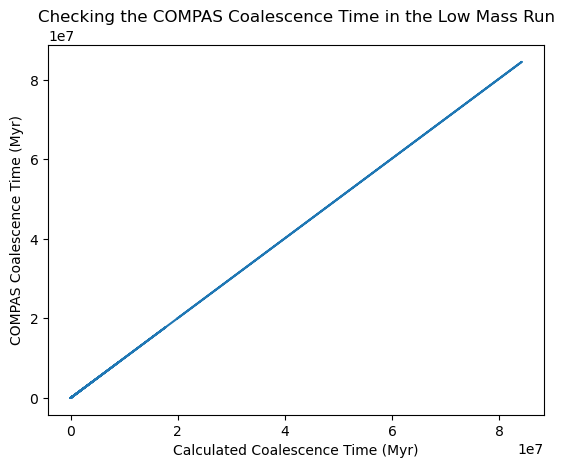

In [30]:
# plotting these against each other just to see if there is any extreme variation 
plt.plot(time_gw2,coalescence_COMPAS2)
plt.xlabel("Calculated Coalescence Time (Myr)")
plt.ylabel("COMPAS Coalescence Time (Myr)")
plt.title("Checking the COMPAS Coalescence Time in the Low Mass Run")
# this mostly looks like a linear line so these values are pretty similar

In [32]:
# let's look at these values in more depth to see the variations in times
DCOs2_NS.insert(2,"Calculated_Coalescence_Time",time_gw2,True)

In [34]:
# in case you run the cell above more than once here is a way to remove the extra column
# DCOs2_NS = DCOs2_NS.drop('Calculated_Coalescence_Time', axis=1)

In [35]:
DCOs2_NS

,CE_Event_Counter,Coalescence_Time,Calculated_Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,...,Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2)
14,1,5.022372e+04,4.998492e+04,0.095905,0,b'2 ',b'4-8 ',1.260009,1.277584,0,...,0,409284,0.028468,13,13,47.267532,0.000009,-1.038851,0.0,0.000000
15,1,4.748315e+00,4.725738e+00,0.623930,0,b'2 ',b'4-8 ',1.260126,1.322620,1,...,0,418855,0.004341,13,13,33.649443,0.000126,-1.694017,0.0,0.000000
23,1,3.162000e+00,3.146965e+00,0.418140,0,b'2 ',b'4-8 ',1.260180,1.277584,1,...,0,438875,0.002976,13,13,35.372554,0.000180,-1.657328,0.0,0.000000
29,1,3.406543e+01,3.390345e+01,0.189972,0,b'4-8 ',b'8 ',1.277719,1.277584,1,...,0,651313,0.004731,13,13,40.497868,0.000135,-1.335271,0.0,0.000000
44,1,1.615129e+05,1.607449e+05,0.878717,0,b'2 ',b'4 ',1.260000,1.454858,0,...,0,646959,0.141550,13,13,33.597505,0.000000,0.000000,0.0,-0.002908
60,1,3.148303e+01,3.133334e+01,0.163235,0,b'5 ',b'8 ',1.277732,1.277584,1,...,0,451628,0.004599,13,13,29.821243,0.000149,-1.317773,0.0,0.000000
64,1,9.700190e+04,9.654068e+04,0.464283,0,b'2 ',b'5-8 ',1.260007,1.277584,0,...,0,465375,0.041168,13,13,36.428816,0.000007,-1.165779,0.0,0.000000
70,1,5.241833e+05,5.216909e+05,0.155147,0,b'2 ',b'3-8 ',1.260007,1.277584,0,...,0,473618,0.051850,13,13,36.441770,0.000007,-0.895173,0.0,0.000000
75,1,8.582748e+01,8.541939e+01,0.459599,0,b'4-8 ',b'8 ',1.277633,1.277584,1,...,0,761020,0.007103,13,13,40.301712,0.000049,-1.432305,0.0,0.000000
86,1,1.563690e+03,1.556255e+03,0.437393,0,b'5 ',b'8 ',1.668267,1.493917,1,...,0,738621,0.016834,13,13,16.502195,0.000020,-1.385497,0.0,0.000000


In [37]:
len(np.where(abs(DCOs2_NS['Coalescence_Time']-DCOs2_NS["Calculated_Coalescence_Time"])<10)[0])
# only about 50% of the times have a difference of 10 Myr

17

In [ ]:
# Data_2.close()